# FINAL PROJECT - Personalized Sleep Spindle Detection in Whole Night Polysomnography

> Group made of Ivan Duvnjak, Enkh-Oyu Nomin, Oleg Lastocichin

## Pre-processing

In [84]:
# import useful libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import os
import mne
from scipy.signal import butter, filtfilt

# import math
# import yasa
# from pacpy import pac as Pac
# from sklearn.model_selection import train_test_split

from scipy import signal
from pyentrp import entropy as ent
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from scipy.signal import butter, filtfilt, hilbert, welch
from scipy.stats import iqr, kurtosis, skew
from PyEMD import EMD
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier as rf

In [85]:
excerpt1 = pd.read_csv("database/excerpt1.txt", delim_whitespace=True, header=None, skiprows=1, names=['amplitude']) # fs = 100

In [86]:
edfs = [] # from 2 to 8, excerpt1 edf does not load
for i in range(1,8):
    edf1 = mne.io.read_raw_edf(f'database/excerpt{i+1}.edf', preload=True) # same data
    edfs.append(edf1)

Extracting EDF parameters from c:\Users\ivand\My Drive\SUPSI\Anno 3 sem 6\key areas 2 FAR\final project far\database\excerpt2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 359999  =      0.000 ...  1799.995 secs...


C:\Users\ivand\AppData\Local\Temp\ipykernel_20608\545250062.py:3: RuntimeWarning: Scaling factor is not defined in following channels:
event_pneumo, event_pneumo_aut
  edf1 = mne.io.read_raw_edf(f'database/excerpt{i+1}.edf', preload=True) # same data
C:\Users\ivand\AppData\Local\Temp\ipykernel_20608\545250062.py:3: RuntimeWarning: Physical range is not defined in following channels:
VAB, NAF2P-A1, PCPAP, POS, FP2-A1, O2-A1, CZ2-A1, event_pneumo, event_pneumo_aut
  edf1 = mne.io.read_raw_edf(f'database/excerpt{i+1}.edf', preload=True) # same data


Extracting EDF parameters from c:\Users\ivand\My Drive\SUPSI\Anno 3 sem 6\key areas 2 FAR\final project far\database\excerpt3.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 89999  =      0.000 ...  1799.980 secs...
Extracting EDF parameters from c:\Users\ivand\My Drive\SUPSI\Anno 3 sem 6\key areas 2 FAR\final project far\database\excerpt4.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 359999  =      0.000 ...  1799.995 secs...


C:\Users\ivand\AppData\Local\Temp\ipykernel_20608\545250062.py:3: RuntimeWarning: Scaling factor is not defined in following channels:
event_pneumo_aut
  edf1 = mne.io.read_raw_edf(f'database/excerpt{i+1}.edf', preload=True) # same data
C:\Users\ivand\AppData\Local\Temp\ipykernel_20608\545250062.py:3: RuntimeWarning: Physical range is not defined in following channels:
PCPAP, event_pneumo_aut
  edf1 = mne.io.read_raw_edf(f'database/excerpt{i+1}.edf', preload=True) # same data


Extracting EDF parameters from c:\Users\ivand\My Drive\SUPSI\Anno 3 sem 6\key areas 2 FAR\final project far\database\excerpt5.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 359999  =      0.000 ...  1799.995 secs...


C:\Users\ivand\AppData\Local\Temp\ipykernel_20608\545250062.py:3: RuntimeWarning: Physical range is not defined in following channels:
PCPAP
  edf1 = mne.io.read_raw_edf(f'database/excerpt{i+1}.edf', preload=True) # same data


Extracting EDF parameters from c:\Users\ivand\My Drive\SUPSI\Anno 3 sem 6\key areas 2 FAR\final project far\database\excerpt6.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 359999  =      0.000 ...  1799.995 secs...


C:\Users\ivand\AppData\Local\Temp\ipykernel_20608\545250062.py:3: RuntimeWarning: Scaling factor is not defined in following channels:
event_pneumo_aut
  edf1 = mne.io.read_raw_edf(f'database/excerpt{i+1}.edf', preload=True) # same data
C:\Users\ivand\AppData\Local\Temp\ipykernel_20608\545250062.py:3: RuntimeWarning: Physical range is not defined in following channels:
VTH, VAB, NAF2P-A1, NAF1, PCPAP, FP2-A1, O2-A1, CZ2-A1, event_pneumo_aut
  edf1 = mne.io.read_raw_edf(f'database/excerpt{i+1}.edf', preload=True) # same data


Extracting EDF parameters from c:\Users\ivand\My Drive\SUPSI\Anno 3 sem 6\key areas 2 FAR\final project far\database\excerpt7.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 359999  =      0.000 ...  1799.995 secs...


C:\Users\ivand\AppData\Local\Temp\ipykernel_20608\545250062.py:3: RuntimeWarning: Scaling factor is not defined in following channels:
PHONO
  edf1 = mne.io.read_raw_edf(f'database/excerpt{i+1}.edf', preload=True) # same data
C:\Users\ivand\AppData\Local\Temp\ipykernel_20608\545250062.py:3: RuntimeWarning: Physical range is not defined in following channels:
PHONO, PCPAP, POS, FP2-A1, O2-A1
  edf1 = mne.io.read_raw_edf(f'database/excerpt{i+1}.edf', preload=True) # same data


Extracting EDF parameters from c:\Users\ivand\My Drive\SUPSI\Anno 3 sem 6\key areas 2 FAR\final project far\database\excerpt8.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 359999  =      0.000 ...  1799.995 secs...


C:\Users\ivand\AppData\Local\Temp\ipykernel_20608\545250062.py:3: RuntimeWarning: Scaling factor is not defined in following channels:
event_pneumo, event_pneumo_aut
  edf1 = mne.io.read_raw_edf(f'database/excerpt{i+1}.edf', preload=True) # same data
C:\Users\ivand\AppData\Local\Temp\ipykernel_20608\545250062.py:3: RuntimeWarning: Physical range is not defined in following channels:
NAF2P-A1, NAF1, PHONO, PCPAP, POS, event_pneumo, event_pneumo_aut
  edf1 = mne.io.read_raw_edf(f'database/excerpt{i+1}.edf', preload=True) # same data


In [87]:
for edf in edfs:
    edf.resample(200) # resampling all data at 200 Hz
    edf.filter(0.3, 35) # applying FIR bandapass filter 

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.3 - 35 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.30
- Lower transition bandwidth: 0.30 Hz (-6 dB cutoff frequency: 0.15 Hz)
- Upper passband edge: 35.00 Hz
- Upper transition bandwidth: 8.75 Hz (-6 dB cutoff frequency: 39.38 Hz)
- Filter length: 2201 samples (11.005 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:    0.1s finished


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.3 - 35 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.30
- Lower transition bandwidth: 0.30 Hz (-6 dB cutoff frequency: 0.15 Hz)
- Upper passband edge: 35.00 Hz
- Upper transition bandwidth: 8.75 Hz (-6 dB cutoff frequency: 39.38 Hz)
- Filter length: 2201 samples (11.005 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.1s finished


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.3 - 35 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.30
- Lower transition bandwidth: 0.30 Hz (-6 dB cutoff frequency: 0.15 Hz)
- Upper passband edge: 35.00 Hz
- Upper transition bandwidth: 8.75 Hz (-6 dB cutoff frequency: 39.38 Hz)
- Filter length: 2201 samples (11.005 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:    0.2s finished


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.3 - 35 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.30
- Lower transition bandwidth: 0.30 Hz (-6 dB cutoff frequency: 0.15 Hz)
- Upper passband edge: 35.00 Hz
- Upper transition bandwidth: 8.75 Hz (-6 dB cutoff frequency: 39.38 Hz)
- Filter length: 2201 samples (11.005 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:    0.3s finished


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.3 - 35 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.30
- Lower transition bandwidth: 0.30 Hz (-6 dB cutoff frequency: 0.15 Hz)
- Upper passband edge: 35.00 Hz
- Upper transition bandwidth: 8.75 Hz (-6 dB cutoff frequency: 39.38 Hz)
- Filter length: 2201 samples (11.005 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:    0.1s finished


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.3 - 35 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.30
- Lower transition bandwidth: 0.30 Hz (-6 dB cutoff frequency: 0.15 Hz)
- Upper passband edge: 35.00 Hz
- Upper transition bandwidth: 8.75 Hz (-6 dB cutoff frequency: 39.38 Hz)
- Filter length: 2201 samples (11.005 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:    0.1s finished


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.3 - 35 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.30
- Lower transition bandwidth: 0.30 Hz (-6 dB cutoff frequency: 0.15 Hz)
- Upper passband edge: 35.00 Hz
- Upper transition bandwidth: 8.75 Hz (-6 dB cutoff frequency: 39.38 Hz)
- Filter length: 2201 samples (11.005 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:    0.1s finished


In [88]:
channels = ["CZ-A1", "C3-A1", "CZ-A1", "CZ-A1", "CZ-A1", "CZ-A1", "CZ-A1"] # channels from 

In [89]:
signals = []
for i, channel in enumerate(channels):
    signals.append(edfs[i][channel][0][0])

In [90]:
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return b, a

In [91]:
def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = filtfilt(b, a, data)
    return y

In [92]:
ex1 = np.array(excerpt1["amplitude"])
ex1 = signal.resample(ex1, len(ex1)*2) # resampling at 200 Hz
ex1 = butter_bandpass_filter(ex1, 0.3, 35, 200)

In [93]:
signals.insert(0, ex1)

In [94]:
len(signals)

8

In [95]:
# pandas format - visual scoring both 1 and 2

def read_visual_scoring_files(num_excerpts, scoring_groups):
    spindle_data = {}

    for group in scoring_groups:
        for i in range(1, num_excerpts + 1):
            path = f"database/Visual_scoring{group}_excerpt{i}.txt"
            file_name = f"Visual_scoring{group}_excerpt{i}.txt"
            
            if os.path.exists(path):
                data = pd.read_csv(path, delim_whitespace=True, header=None, skiprows=1, names=['timestamp', 'duration_spindle'])
                spindle_data[file_name] = data
            else:
                print(f"File {file_name} does not exist.")

    return spindle_data

scoring_groups = ['1', '2']
visual_scoring_data = read_visual_scoring_files(8, scoring_groups)

File Visual_scoring2_excerpt7.txt does not exist.
File Visual_scoring2_excerpt8.txt does not exist.


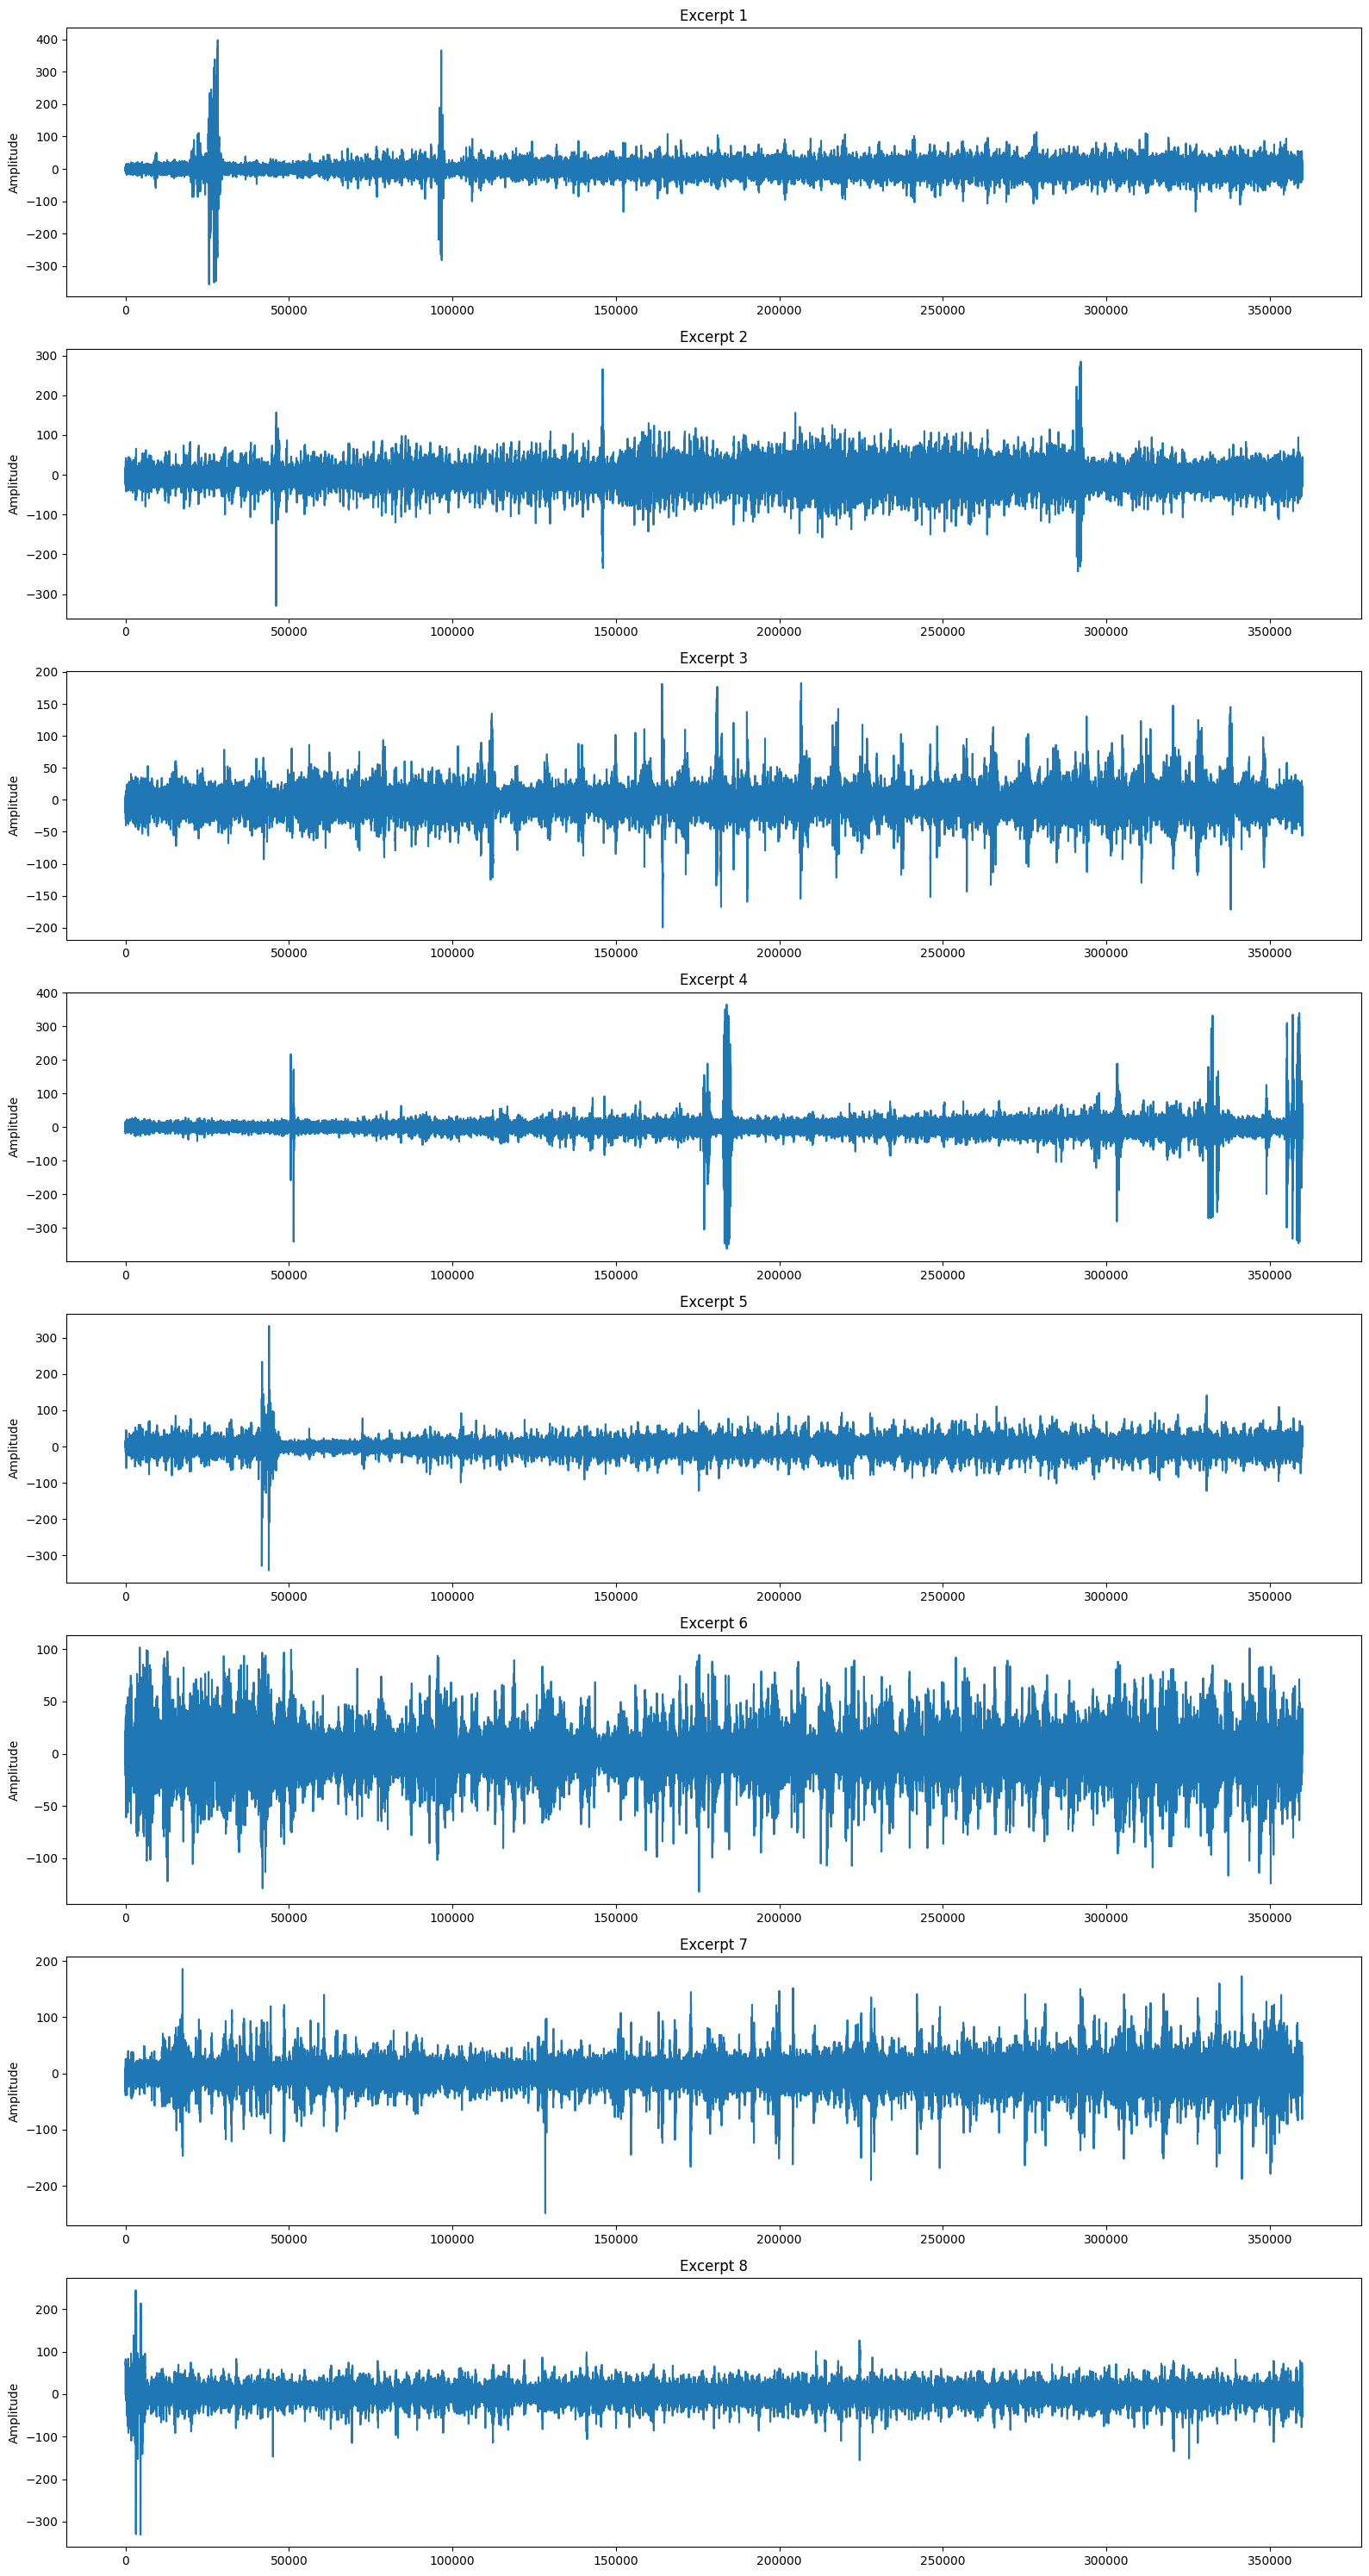

In [96]:
t_ax = np.arange(len(signals[0]/200))

fig, axs = plt.subplots(8, figsize=(16, 30))
for i in range(8):
    axs[i].set_title(f"Excerpt {i+1}")
    axs[i].plot(t_ax, signals[i])
    axs[i].plot()
    axs[i].set(ylabel='Amplitude')
plt.tight_layout()

Expert 1 scoring


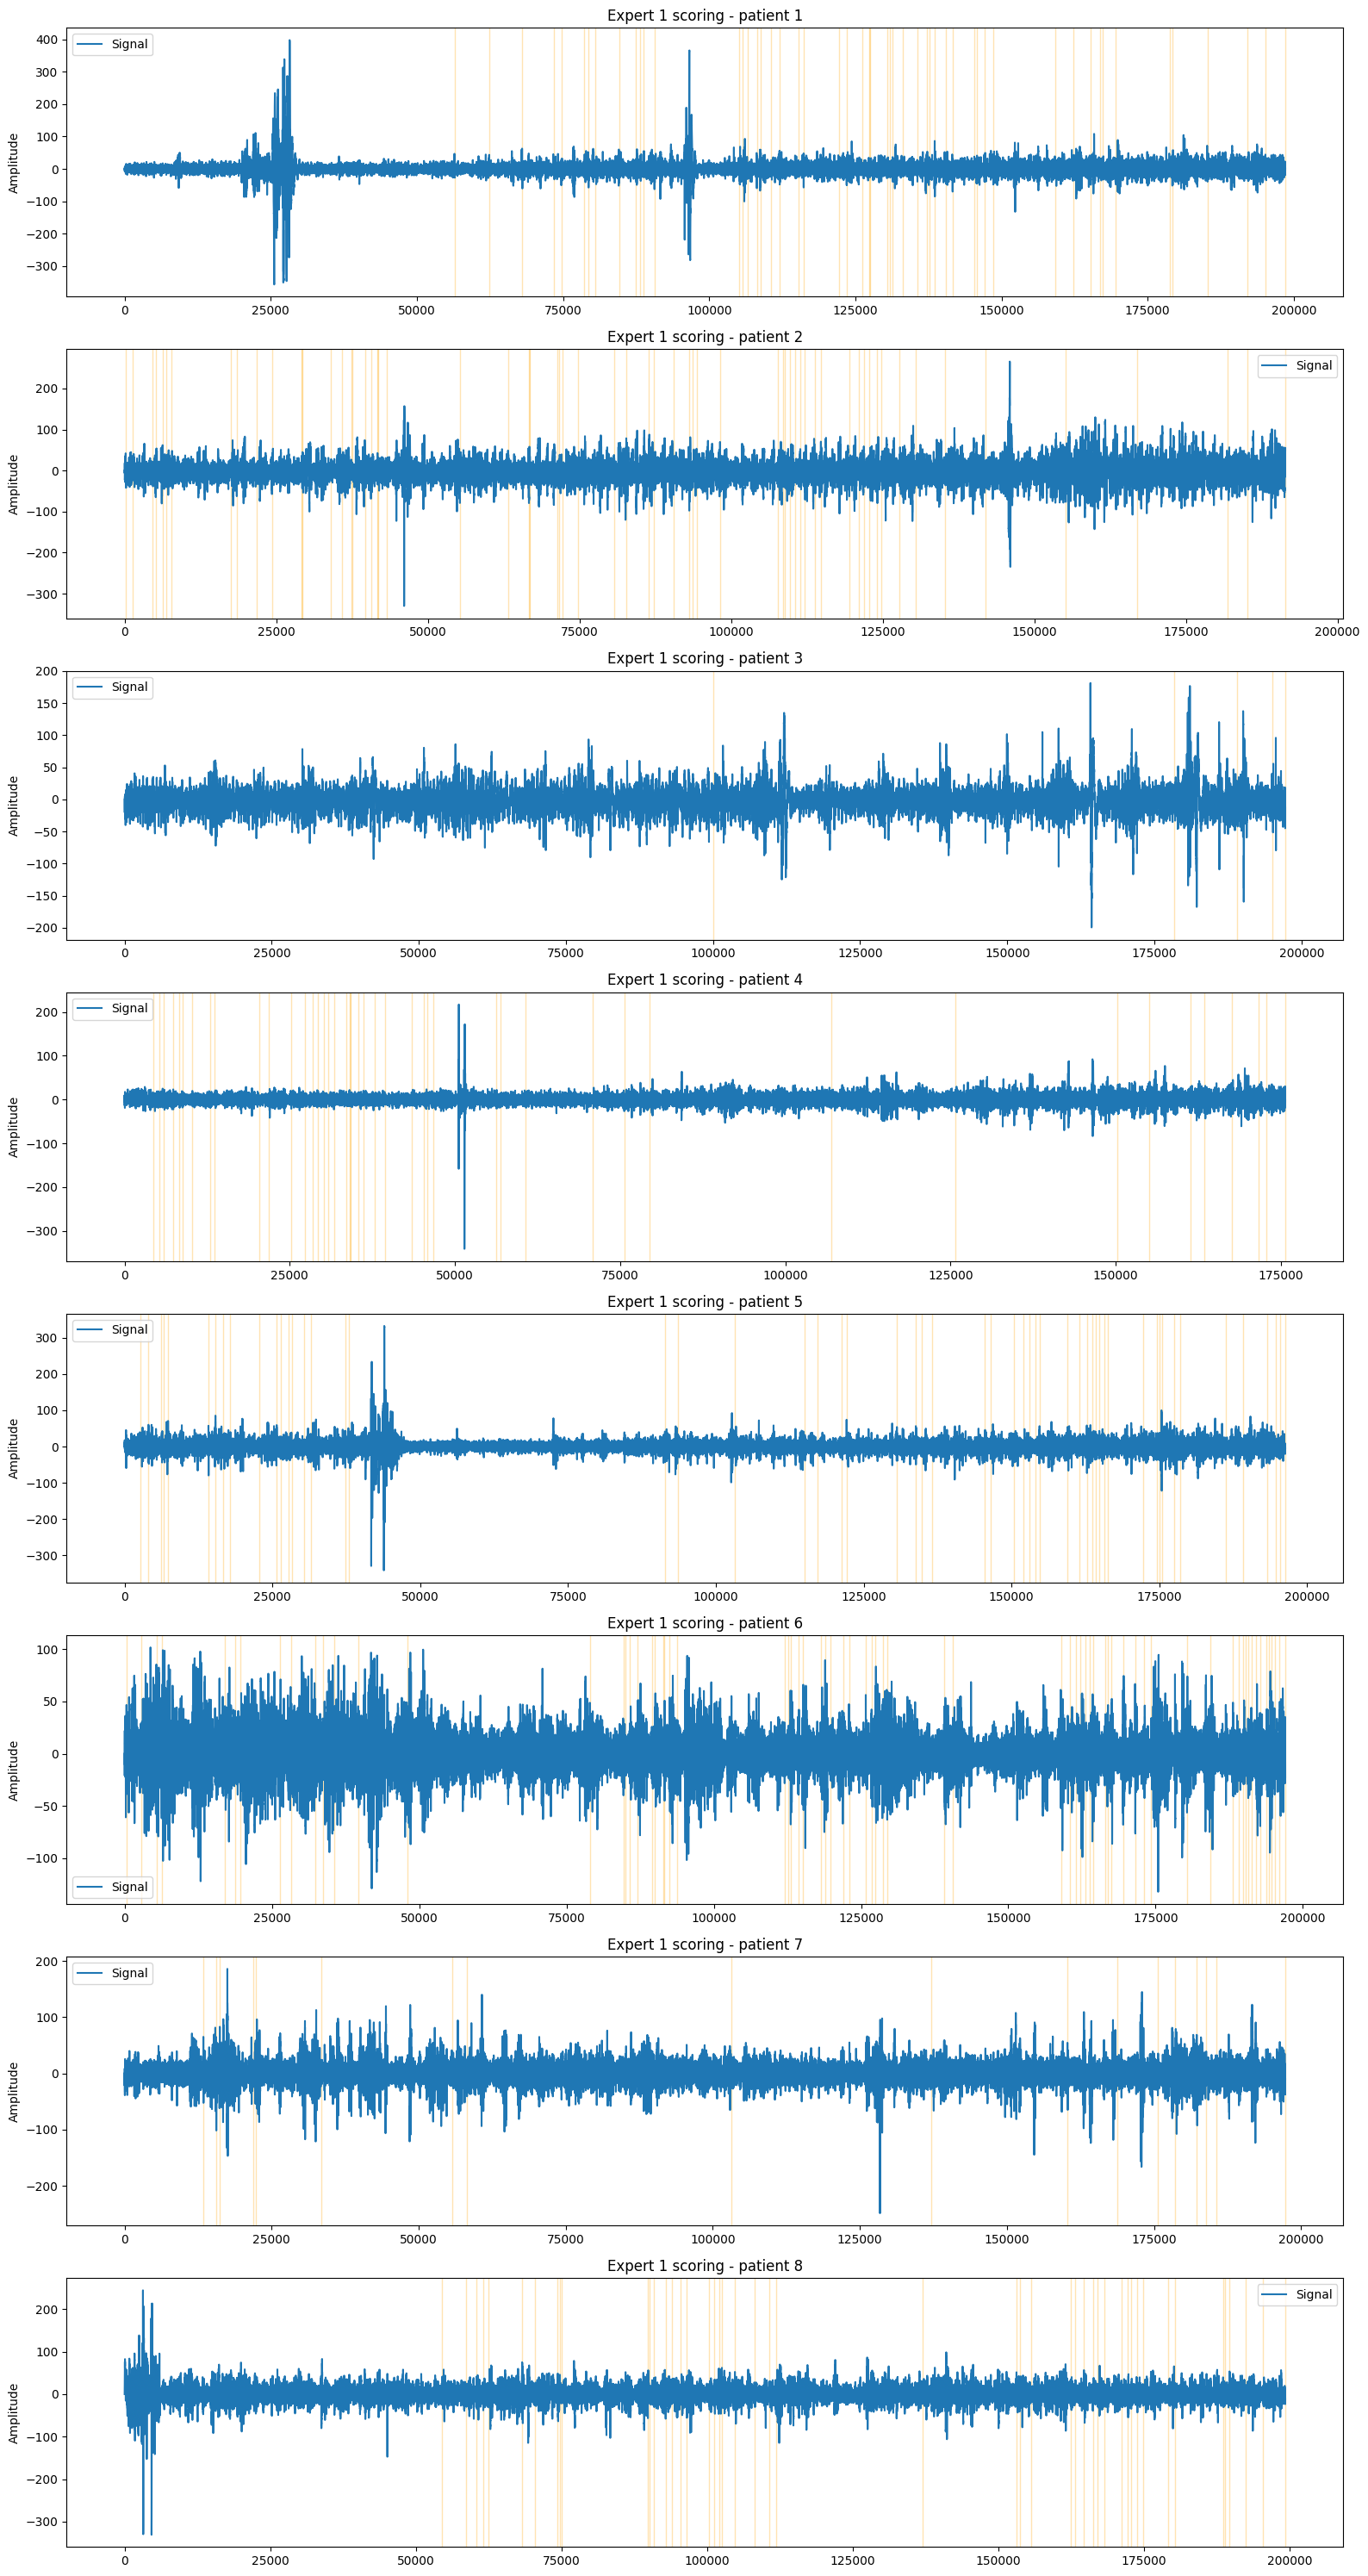

In [97]:
i = 0 

fig, axs = plt.subplots(8, figsize=(16, 30))
print("Expert 1 scoring")
for key in visual_scoring_data.keys():
    for timestamp, duration in zip(visual_scoring_data[key]["timestamp"], visual_scoring_data[key]["duration_spindle"]):
        axs[i].axvspan(timestamp*200, timestamp*200+duration, color='orange', alpha=0.3)
    axs[i].plot(signals[i][:int(timestamp*200+1)], label="Signal")
    axs[i].set(ylabel='Amplitude')
    axs[i].set_title(f"Expert 1 scoring - patient {i+1}")
    axs[i].legend()
    i+=1
    if i == 8:
        break
plt.tight_layout()

Expert 2 scoring


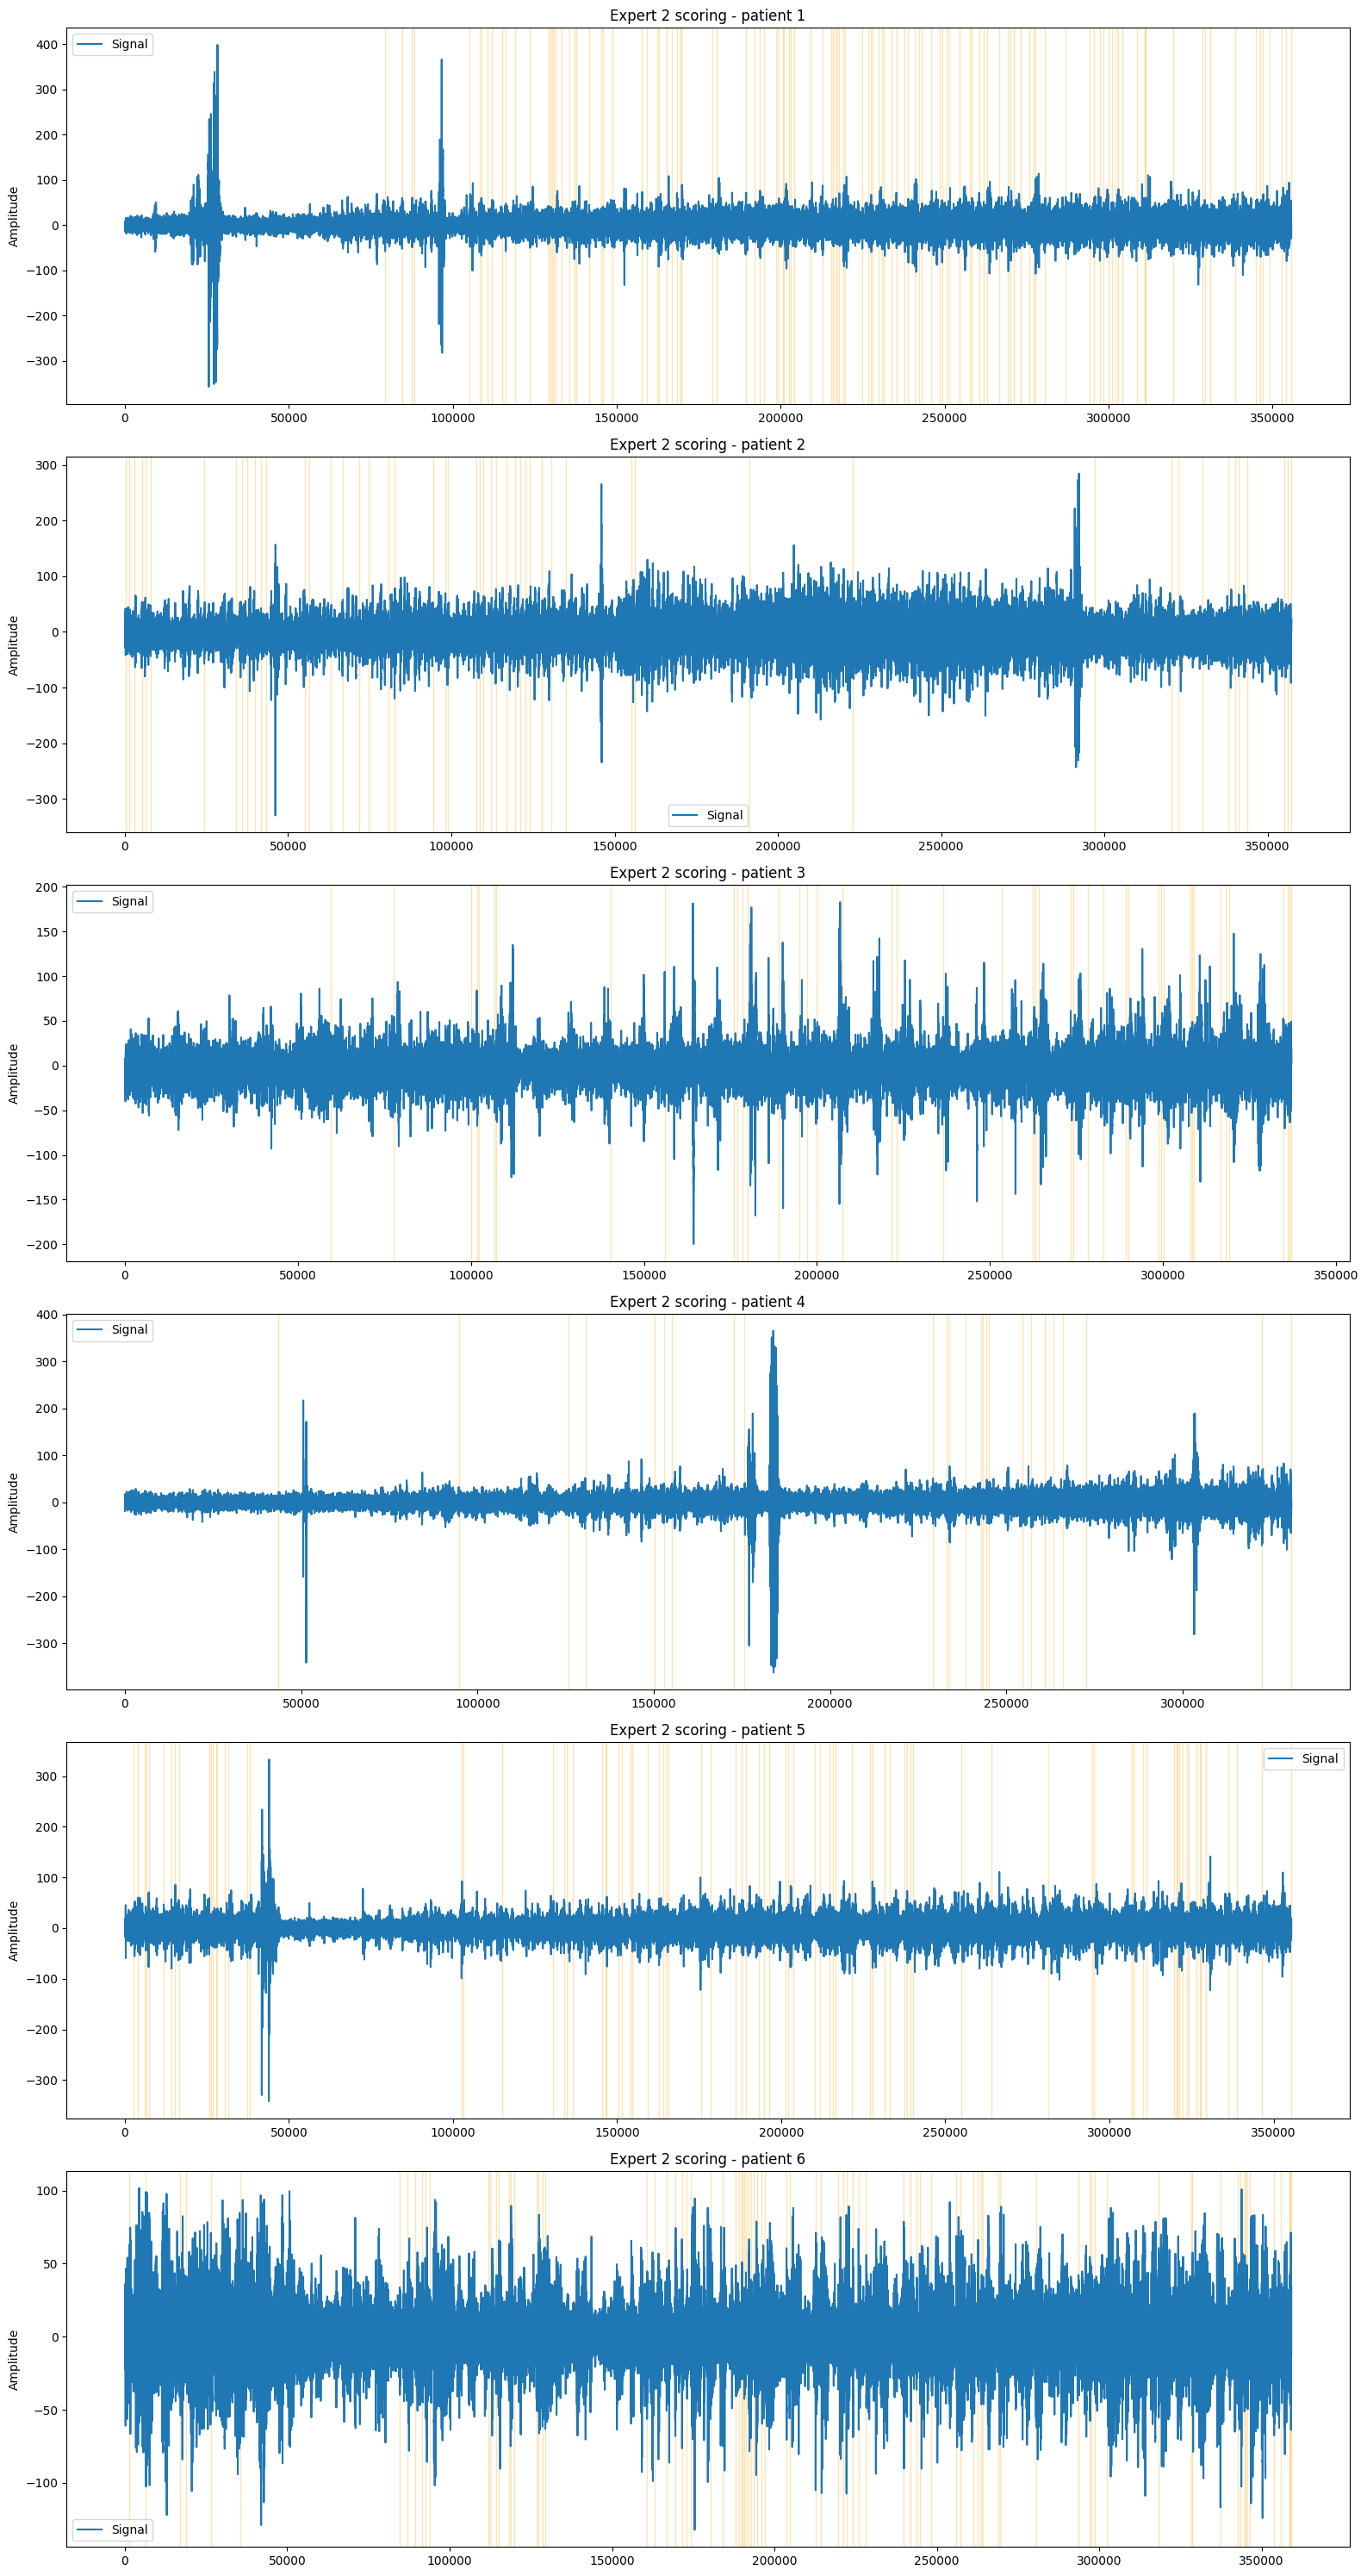

In [98]:
i = 0 

fig, axs = plt.subplots(6, figsize=(16, 30))
print("Expert 2 scoring")
for key in visual_scoring_data.keys():
    if i > 7:
        for timestamp, duration in zip(visual_scoring_data[key]["timestamp"], visual_scoring_data[key]["duration_spindle"]):
            axs[i-8].axvspan(timestamp*200, timestamp*200+duration, color='orange', alpha=0.3)
        axs[i-8].plot(signals[i-8][:int(timestamp*200+1)], label="Signal")
        axs[i-8].set(ylabel='Amplitude')
        axs[i-8].set_title(f"Expert 2 scoring - patient {i-7}")
        axs[i-8].legend()
    i+=1
    if i-8 == 6:
        break
plt.tight_layout()

## Feature extraction / Feature selection

Functions to extrapolate the features

In [99]:
def compute_modulation_index(phase, amplitude_envelope):
    '''Computes the modulation index, a measure of PAC.'''

    # mean vector length
    mean_vector_length = np.abs(np.mean(np.exp(1j * phase)))

    # mean amplitude
    mean_amplitude = np.mean(amplitude_envelope)

    # modulation index
    modulation_index = mean_vector_length - mean_amplitude

    return modulation_index

In [100]:
def compute_pac(signal, low_freq_range, high_freq_range, fs):
    '''Computes the Phase-Amplitude Coupling (PAC) measure between two frequency components of a signal.'''

    # filtering
    low_freq_signal = butter_bandpass_filter(signal, low_freq_range[0], low_freq_range[1], fs, order=4)
    high_freq_signal = butter_bandpass_filter(signal, high_freq_range[0], high_freq_range[1], fs, order=4)

    # phase calculation (of the low-frequency component)
    analytic_signal = hilbert(low_freq_signal)
    phase = np.angle(analytic_signal)

    # amplitude calculation (of the high-frequency component)
    amplitude_envelope = np.abs(hilbert(high_freq_signal))

    # PAC Measure (e.g. Modulation Index)
    modulation_index = compute_modulation_index(phase, amplitude_envelope)

    return modulation_index

In [101]:
def compute_energy(signal, band_freq_range, fs):
    '''This function computes the energy of a signal within a 
    specified frequency band.'''

    # filtering the signal within the specified frequency band
    band_filtered_signal = butter_bandpass_filter(signal, band_freq_range[0], band_freq_range[1], fs, order=4)
    
    # energy of the filtered signal
    energy = np.sum(np.square(band_filtered_signal))
    return energy

In [102]:
def compute_energy_ratio(signal, band_freq_range, fs):
    '''This function computes the ratio of energy in a specified 
    frequency band to the total energy of the signal.'''

    # compute energy in the specified frequency band
    energy_band = compute_energy(signal, band_freq_range, fs)
    
    # total energy of the signal
    total_energy = np.sum(np.square(signal))
    
    # energy ratio
    energy_ratio = energy_band / total_energy
    return energy_ratio

In [103]:
def compute_pwr_peak(signal, fs, spindle_freq_range):
    '''Computes the maximum power within a specified frequency range.'''
    
    # compute PSD using Welch's method
    f, Pxx = welch(signal, fs=fs, nperseg=fs*2)  # Using a window length of 2 seconds
    
    # find indices corresponding to the frequency band of interest 
    spindle_freq_indices = np.where((f >= spindle_freq_range[0]) & (f <= spindle_freq_range[1]))[0]
    
    # find the maximum power value within the spindle frequency band
    pwr_peak = np.max(Pxx[spindle_freq_indices])
    
    return pwr_peak

In [104]:
def compute_pwr_ratio(signal, fs, spindle_freq_range, low_freq_range):
    '''Computes the ratio of power between two frequency bands.'''
    
    # compute PSD using Welch's method
    f, Pxx = welch(signal, fs=fs, nperseg=fs*2)  # Using a window length of 2 seconds
    
    # find indices corresponding to the frequency bands of interest
    spindle_freq_indices = np.where((f >= spindle_freq_range[0]) & (f <= spindle_freq_range[1]))[0]
    low_freq_indices = np.where((f >= low_freq_range[0]) & (f <= low_freq_range[1]))[0]
    
    # compute total power of the spindle spectral band
    total_power_spindle = np.sum(Pxx[spindle_freq_indices])
    
    # compute total power of the low-frequency band
    total_power_low_freq = np.sum(Pxx[low_freq_indices])
    
    # PWRratio
    pwr_ratio = total_power_spindle / total_power_low_freq
    
    return pwr_ratio

In [105]:
def compute_iqr(signal):
    '''
    Computes the Interquartile Range (IQR) of the first mode obtained through 
    Empirical Mode Decomposition (EMD).'''
    emd = EMD()

    # perform Empirical Mode Decomposition
    imfs = emd(signal)
    
    # select the first mode (higher frequency components)
    first_mode = imfs[0]
    
    # compute IQR of the amplitude of the first mode
    iqr_value = iqr(first_mode)
    
    return iqr_value

In [106]:
def compute_maximum(signal):
    return np.max(signal)

def compute_minimum(signal):
    return np.min(signal)

def compute_variance(signal):
    return np.var(signal)

def compute_standard_deviation(signal):
    return np.std(signal)

def compute_kurtosis(signal):
    return kurtosis(signal)

def compute_skewness(signal):
    return skew(signal)

In [107]:
def extract_features_one(window_data, low_freq_range, high_freq_range, fs, spindle_freq_range):

    sp_en = ent.sample_entropy(window_data, sample_length=1, tolerance=0.05*np.std(window_data))
    pac_value = compute_pac(window_data, low_freq_range, high_freq_range, fs=fs)
    energy_ratio = compute_energy_ratio(window_data, high_freq_range, fs)
    pwr_peak = compute_pwr_peak(window_data, fs, spindle_freq_range)
    pwr_ratio = compute_pwr_ratio(window_data, fs, spindle_freq_range, low_freq_range)
    iqr_value = compute_iqr(window_data)
    maximum = compute_maximum(window_data)
    minimum = compute_minimum(window_data)
    variance = compute_variance(window_data)
    standard_deviation = compute_standard_deviation(window_data)
    kurt = compute_kurtosis(window_data)
    skewness = compute_skewness(window_data)

    features = [
            float(sp_en), 
            float(pac_value), 
            float(energy_ratio), 
            float(pwr_peak), 
            float(pwr_ratio), 
            float(iqr_value), 
            float(maximum), 
            float(minimum), 
            float(variance), 
            float(standard_deviation), 
            float(kurt),
            float(skewness)]

    return features

In [108]:
# modifying the extract_features function to include SpEn feature
def extract_features(signal, window_size, step_size, low_freq_range, high_freq_range, fs, spindle_freq_range):
    '''Extracts a set of features from a signal window'''
    features = []
    num_windows = int((len(signal) - window_size) / step_size) + 1
    
    for i in range(num_windows):
        window_start = i * step_size
        window_end = window_start + window_size
        
        # extracting features from the window
        window_data = signal[window_start:window_end]
        features.append(extract_features_one(window_data, low_freq_range, high_freq_range, fs, spindle_freq_range))
        
    return features

In [109]:
def extract_labels(signal, window_size, step_size, spindle_timestamps, spindle_durations):
    labels = []
    num_windows = int((len(signal) - window_size) / step_size) + 1
    
    for i in range(num_windows):
        window_start = i * step_size
        window_end = window_start + window_size
        # calcuate the coverage of spindle within the current window
        spindle_coverage = 0
        for spindle_timestamp, spindle_duration in zip(spindle_timestamps, spindle_durations):
            if (spindle_timestamp >= window_start and spindle_timestamp <= window_end) or (spindle_timestamp + spindle_duration >= window_start and spindle_timestamp + spindle_duration <= window_end):
                # calculate the overlap duration
                overlap_start = max(spindle_timestamp, window_start)
                overlap_end = min(spindle_timestamp + spindle_duration, window_end)
                overlap_duration = overlap_end - overlap_start
                spindle_coverage += overlap_duration

        # check if spindle coverage is >= 70% of the window duration
        if spindle_coverage / window_size >= 0.001:
            labels.append(1)  # Assign label 1 for spindle
        else:
            labels.append(0)  # Assign label 0 for non-spindle
        
    return labels

In [110]:
# function to prepare data for training
def prepare_data(signals, window_size, step_size, low_freq_range, high_freq_range, spindle_freq_range, fs, spindle_data):
    '''Prepares data for test set.'''
    X = []
    y = []
    spindle_timestamps = []
    spindle_durations = []

    for scorings in spindle_data:
        spindle_timestamps.append(scorings["timestamp"])
        spindle_durations.append(scorings["duration_spindle"])

    for i, signal in enumerate(signals):
        evaluated_signal = int(max(spindle_timestamps[i]) * fs)
        signal1 = signal[:evaluated_signal]
        # extract features from the signal
        features = extract_features(signal1, window_size, step_size, low_freq_range, high_freq_range, fs, spindle_freq_range)
        X.extend(features)
        
        # assign labels (1 for spindle, 0 for non-spindle)
        labels = extract_labels(signal1, window_size, step_size, spindle_timestamps[i], spindle_durations[i])
        y.extend(labels)
    return X, y

Separating scores from the two experts

In [111]:
visual_scoring_data_e1 = []
visual_scoring_data_e2 = []
for s in range(8):
    s = visual_scoring_data[f"Visual_scoring1_excerpt{s+1}.txt"]
    visual_scoring_data_e1.append(s)

for s in range(6):
    s = visual_scoring_data[f"Visual_scoring2_excerpt{s+1}.txt"]
    visual_scoring_data_e2.append(s)    

Creating test dataset, moving window 0.5 sec, step of 0.1 sec on one signal

In [112]:
window_size = 100  # 0.5 seconds * 200 Hz sampling rate
step_size = 20  # 0.1 seconds * 200 Hz sampling rate

low_freq_range = (0.3, 8)  
high_freq_range = (11, 16)   
spindle_freq_range = (11, 14)  
fs = 200  

# X1, y1 = prepare_data(signals, window_size, step_size, low_freq_range, high_freq_range, spindle_freq_range, fs, visual_scoring_data_e1)
X_test2, y_test2 = prepare_data(signals[1:2], window_size, step_size, low_freq_range, high_freq_range, spindle_freq_range, fs, visual_scoring_data_e2[1:2]) #expert 2 data

c:\Users\ivand\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\signal\_spectral_py.py:2017: UserWarning: nperseg = 400 is greater than input length  = 100, using nperseg = 100
  warnings.warn('nperseg = {0:d} is greater than input length '
C:\Users\ivand\AppData\Local\Temp\ipykernel_20608\2501286507.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  float(sp_en),


Creating training dataset 15 spindles and 15 non spindles for each PSG, 0.5s window from which it was located

In [113]:
spindles_feat = []

for s in range(6):
    p_spindles = []
    for i, row in visual_scoring_data_e2[s].iterrows():
        step_beg = int(row["timestamp"] * fs)
        p_spindles.append(step_beg)
    
    spindle = []
    spindle_inx = []
    while len(spindle) < 15:

        rand_window = random.choice(p_spindles)

        if rand_window not in spindle_inx:
            window_data = signals[s][rand_window:rand_window+window_size]
            features = extract_features_one(window_data, low_freq_range, high_freq_range, fs, spindle_freq_range)
            spindle_inx.append(rand_window)
            spindle.append(features)
            
    spindles_feat.extend(spindle)

C:\Users\ivand\AppData\Local\Temp\ipykernel_20608\2501286507.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  float(sp_en),


In [114]:
non_spindles_feat = []

for s in range(6):
    p_spindles = []
    for i, row in visual_scoring_data_e2[s].iterrows():
        step_beg = int(row["timestamp"] * fs)
        step_end = int(row["timestamp"] * fs) + window_size

        p_spindles.extend(np.arange(step_beg, step_end))
    
    no_spindle = []
    no_spindle_inx = []
    while len(no_spindle) < 15:
        length = len(signals[s])-window_size

        rand_window = random.choice(range(length))

        if rand_window not in p_spindles or no_spindle_inx:
            window_data = signals[s][rand_window:rand_window+window_size]
            features = extract_features_one(window_data, low_freq_range, high_freq_range, fs, spindle_freq_range)
            no_spindle.append(features)
            no_spindle_inx.append(rand_window)

    non_spindles_feat.extend(no_spindle)

C:\Users\ivand\AppData\Local\Temp\ipykernel_20608\2501286507.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  float(sp_en),


In [115]:
X_train = spindles_feat + non_spindles_feat
ones = np.zeros(len(spindles_feat)) +1
zeros =  np.zeros(len(non_spindles_feat))
y_train = np.concatenate((ones, zeros))

## Spindle recognition with a classifier - SVM

In [116]:
svm_classifier = SVC()
parameters_svm = {'kernel': ['rbf'], 'gamma': np.logspace(-15, 3, 10, base=2),
                  'C': np.logspace(-5, 9, 8, base=2), 'class_weight': ['balanced']}

# perform GridSearchCV
cv = StratifiedKFold(5, shuffle=True, random_state=42)
grid_search = GridSearchCV(estimator=svm_classifier, param_grid=parameters_svm, cv=cv, scoring='accuracy')
grid_search.fit(X_train, y_train)

# best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'C': 8.0, 'class_weight': 'balanced', 'gamma': 3.0517578125e-05, 'kernel': 'rbf'}
Best Score: 0.7555555555555556


The SVM classifier was trained on a dataset composed by 30 samples from the same PSG: 15 spindles, randomly selected among the one identified by the scorer, and 15 non-spindles. The selected features were extracted from these samples, in particular they were extracted from time windows of 0.5 seconds. Then the trained classifier was tested on the whole recording. The test set consists of sliding windows of 0.5 seconds, shifted on the whole signal with steps of 0.1 second. The classifier predicts the presence or non-presence of a spindle in each window


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80     17790
           1       0.00      0.28      0.01        69

    accuracy                           0.67     17859
   macro avg       0.50      0.47      0.40     17859
weighted avg       0.99      0.67      0.80     17859


Confusion Matrix:


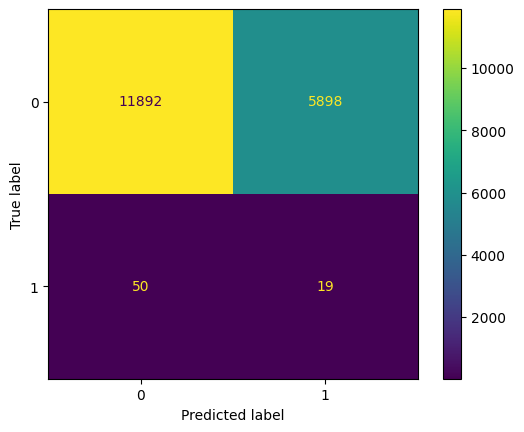

In [118]:
# predict on the test set using the best model
best_svm_classifier = grid_search.best_estimator_
y_pred = best_svm_classifier.predict(X_test2)

# evaluation
print("\nClassification Report:")
print(classification_report(y_test2, y_pred))
print("\nConfusion Matrix:")

confusion_mat = confusion_matrix(y_test2, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_mat, display_labels = [0, 1])
cm_display.plot()
plt.show()  

After the classification procedure, a post-processing phase is needed. With the windowing procedure a single spindle is detected by consecutive overlapping windows. Therefore it
is necessary to aggregate them in just one window enclosing the whole spindle pattern. On the other hand, when a spindle is detected only by one window, it is almost certainly a non-spindle (false positive).

Training a different model: Random Forest

In [119]:
rf_classifier = rf()
parameters_rf = {"n_estimators": range(10, 101, 10),
                 'criterion': ['gini', 'entropy'],
                 'class_weight': ['balanced_subsample', 'balanced']}

# perform GridSearchCV
cv = StratifiedKFold(5, shuffle=True, random_state=42)
grid_search_rf = GridSearchCV(estimator=rf_classifier, param_grid=parameters_rf, cv=cv, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

# best parameters and best score
print("Best Parameters:", grid_search_rf.best_params_)
print("Best Score:", grid_search_rf.best_score_)

Best Parameters: {'class_weight': 'balanced_subsample', 'criterion': 'entropy', 'n_estimators': 50}
Best Score: 0.8444444444444444



Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.74      0.85     17790
           1       0.01      0.38      0.01        69

    accuracy                           0.74     17859
   macro avg       0.50      0.56      0.43     17859
weighted avg       0.99      0.74      0.85     17859


Confusion Matrix:


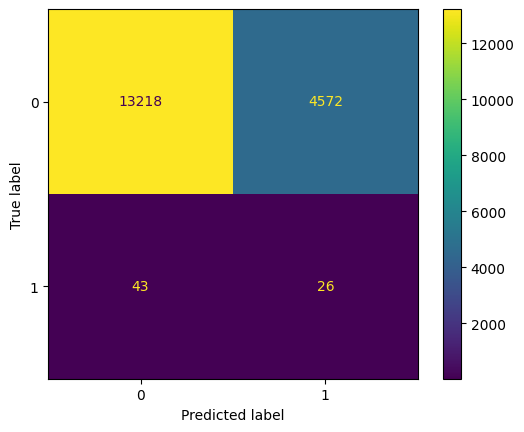

In [121]:
# predict on the test set using the best model
best_rf_classifier = grid_search_rf.best_estimator_
y_pred = best_rf_classifier.predict(X_test2)

# evaluation
print("\nClassification Report:")
print(classification_report(y_test2, y_pred))
print("\nConfusion Matrix:")
confusion_mat = confusion_matrix(y_test2, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_mat, display_labels = [0, 1])
cm_display.plot()
plt.show()  

Increasing dataset size to try and improve performance

In [122]:
# increase size of training set

spindles_feat = []

for s in range(6):
    p_spindles = []
    for i, row in visual_scoring_data_e2[s].iterrows():
        step_beg = int(row["timestamp"] * fs)
        p_spindles.append(step_beg)
    
    spindle = []

    for window in p_spindles:
        window_data = signals[s][window:window+window_size]
        features = extract_features_one(window_data, low_freq_range, high_freq_range, fs, spindle_freq_range)
        spindle.append(features)
    spindles_feat.extend(spindle)

c:\Users\ivand\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\signal\_spectral_py.py:2017: UserWarning: nperseg = 400 is greater than input length  = 100, using nperseg = 100
  warnings.warn('nperseg = {0:d} is greater than input length '
C:\Users\ivand\AppData\Local\Temp\ipykernel_20608\2501286507.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  float(sp_en),


In [123]:
# increase size of training set


non_spindles_feat = []

for s in range(6):
    p_spindles = []
    for i, row in visual_scoring_data_e2[s].iterrows():
        step_beg = int(row["timestamp"] * fs)
        p_spindles.append(step_beg)
    
    spindle = []
    while len(spindle) < len(spindles_feat) // 6:

        rand_window = random.choice(range(length))

        if rand_window not in p_spindles:
            window_data = signals[s][rand_window:rand_window+window_size]
            features = extract_features_one(window_data, low_freq_range, high_freq_range, fs, spindle_freq_range)
            spindle.append(features)
    non_spindles_feat.extend(spindle)

C:\Users\ivand\AppData\Local\Temp\ipykernel_20608\2501286507.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  float(sp_en),


In [124]:
X_train = spindles_feat + non_spindles_feat
ones = np.zeros(len(spindles_feat)) +1
zeros =  np.zeros(len(non_spindles_feat))
y_train = np.concatenate((ones, zeros))

In [125]:
svm_classifier = SVC()
parameters_svm = {'kernel': ['rbf'], 'gamma': np.logspace(-15, 3, 10, base=2),
                  'C': np.logspace(-5, 9, 8, base=2), 'class_weight': ['balanced']}

# perform GridSearchCV
cv = StratifiedKFold(5, shuffle=True, random_state=42)
grid_search = GridSearchCV(estimator=svm_classifier, param_grid=parameters_svm, cv=cv, scoring='accuracy')
grid_search.fit(X_train, y_train)

# best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'C': 512.0, 'class_weight': 'balanced', 'gamma': 3.0517578125e-05, 'kernel': 'rbf'}
Best Score: 0.8335029178512643



Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.75      0.85     17790
           1       0.01      0.39      0.01        69

    accuracy                           0.75     17859
   macro avg       0.50      0.57      0.43     17859
weighted avg       0.99      0.75      0.85     17859


Confusion Matrix:


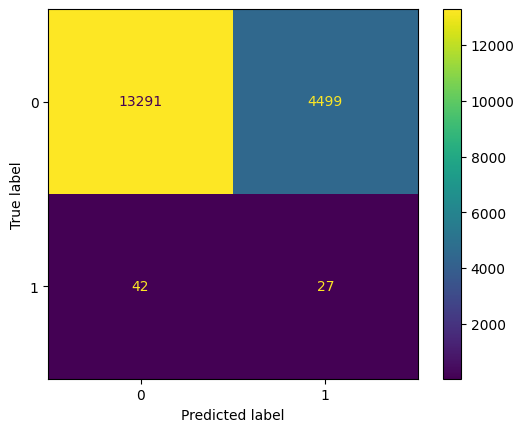

In [127]:
# predict on the test set using the best model
best_svm_classifier = grid_search.best_estimator_
y_pred = best_svm_classifier.predict(X_test2)

# evaluation
print("\nClassification Report:")
print(classification_report(y_test2, y_pred))
print("\nConfusion Matrix:")

confusion_mat = confusion_matrix(y_test2, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_mat, display_labels = [0, 1])
cm_display.plot()
plt.show()  

Random forest

In [128]:
rf_classifier = rf()
parameters_rf = {"n_estimators": range(10, 101, 10),
                 'criterion': ['gini', 'entropy'],
                 'class_weight': ['balanced_subsample', 'balanced']}

# perform GridSearchCV
cv = StratifiedKFold(5, shuffle=True, random_state=42)
grid_search_rf = GridSearchCV(estimator=rf_classifier, param_grid=parameters_rf, cv=cv, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

# best parameters and best score
print("Best Parameters:", grid_search_rf.best_params_)
print("Best Score:", grid_search_rf.best_score_)

Best Parameters: {'class_weight': 'balanced', 'criterion': 'gini', 'n_estimators': 70}
Best Score: 0.8787670207990423



Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.76      0.86     17790
           1       0.01      0.36      0.01        69

    accuracy                           0.76     17859
   macro avg       0.50      0.56      0.44     17859
weighted avg       0.99      0.76      0.86     17859


Confusion Matrix:


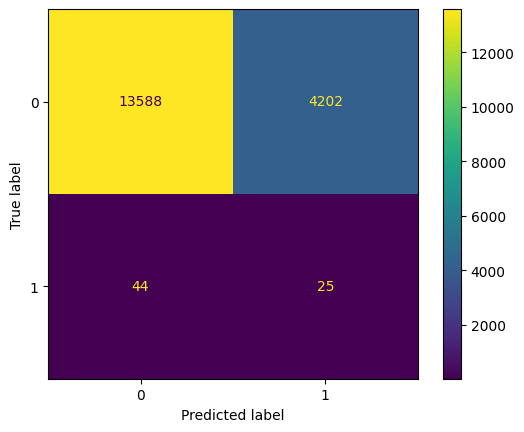

In [130]:
# predict on the test set using the best model
best_rf_classifier = grid_search_rf.best_estimator_
y_pred = best_rf_classifier.predict(X_test2)

# evaluation
print("\nClassification Report:")
print(classification_report(y_test2, y_pred))
print("\nConfusion Matrix:")
confusion_mat = confusion_matrix(y_test2, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_mat, display_labels = [0, 1])
cm_display.plot()
plt.show()  